📍Introduction

Welcome to "AutoScout Data Analysis Project". This is the capstone project of Data Analysis Module. Auto Scout data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

📌The project consists of 3 parts:

🔍First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.

🔍Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.

🔍Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.

🔍Need to Study :

.str.method  
.contains()    
.extract()    
.to_datetime()   
.get_dummies()     
.add_prefix()      
.sample()    
.regex   
.to_numeric()    
.isin()     
.corr()      

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('this will not show')

In [4]:
df=pd.read_csv('part_2_scout_not_dummy.csv')
df.head()

,Unnamed: 0,Price,hp,Type,Warranty,Brand,Model,Age,Nr_of_Doors,Number_of_Seats,...,Prev_Owner,Inspection_New,Body_Color,Paint_Type,Uphol_Material,Uphol_Colors,Country_Cons,City_Cons,Comb_Cons,New_KM
0,0,15770,66,Used,12.0,Audi,A1,3.0,5.0,5.0,...,2.0,Yes,Black,Metallic,Cloth,Black,4.3,3.5,3.8,56013.0
1,1,14500,141,Used,12.0,Audi,A1,2.0,3.0,4.0,...,1.0,No,Red,Metallic,Cloth,Grey,7.1,4.7,5.6,80000.0
2,2,14640,85,Used,12.0,Audi,A1,3.0,4.0,4.0,...,1.0,No,Black,Metallic,Cloth,Black,4.4,3.4,3.8,83450.0
3,3,14500,66,Used,12.0,Audi,A1,3.0,3.0,4.0,...,1.0,No,Brown,Metallic,Cloth,Grey,4.3,3.5,3.8,73000.0
4,4,16790,66,Used,12.0,Audi,A1,3.0,5.0,5.0,...,1.0,Yes,Black,Metallic,Cloth,Black,4.6,3.8,4.1,16200.0


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## FUNCTIONS

In [6]:
def check_col(df,check_col):
    print(check_col,", Sumation of isnull :",df[check_col].isnull().sum())
    print("-----------------")
    print( "Samples for",check_col, "\n", df[check_col].sample(10))
    print("-----------------")
    print(check_col, "Value_counts is", "\n",df[check_col].value_counts(dropna=False))

In [7]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [8]:
def fill_most(df, group_col, col_name):
    '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        grp_inx = list(df[cond][col_name].index)
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond][col_name].mode()[0])
        else:
            df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[col_name].mode()[0])
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [9]:
def fill_prop(df, group_col, col_name):
    '''Fills the missing values with "ffill and bfill method" according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        grp_inx = list(df[cond][col_name].index)
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [10]:
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill"
    '''Fills the missing values based on selected method (mode/median/ffill) according to two-stage grouping'''
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if (mode1 != []) and (mode2 != []):
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond2][col_name].mode()[0]).fillna(df[cond1][col_name].mode()[0])
                elif mode1 != []:
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond1][col_name].mode()[0])
                else:
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[col_name].mode()[0])
                
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [11]:
df.head(5).T

,0,1,2,3,4
Price,15770,14500,14640,14500,16790
hp,66,141,85,66,66
Type,Used,Used,Used,Used,Used
Warranty,12.0,12.0,12.0,12.0,12.0
Brand,Audi,Audi,Audi,Audi,Audi
Model,A1,A1,A1,A1,A1
Age,3.0,2.0,3.0,3.0,3.0
Nr_of_Doors,5.0,3.0,4.0,3.0,5.0
Number_of_Seats,5.0,4.0,4.0,4.0,5.0
Gearing_Type,Automatic,Automatic,Automatic,Automatic,Automatic


In [12]:
df.shape

(15919, 34)

In [13]:
list(df.columns)

['Price',
 'hp',
 'Type',
 'Warranty',
 'Brand',
 'Model',
 'Age',
 'Nr_of_Doors',
 'Number_of_Seats',
 'Gearing_Type',
 'Engine_Disp_cc',
 'Cylinders',
 'Drive_chain',
 'Fuel',
 'CO2_Emission',
 'Emission_Class',
 'Comfort_Convenience',
 'Entertainment_Media',
 'Extras',
 'Safety_Security',
 'Gears',
 'Body_Type',
 'VAT_Deductable',
 'Price_Negotiable',
 'Prev_Owner',
 'Inspection_New',
 'Body_Color',
 'Paint_Type',
 'Uphol_Material',
 'Uphol_Colors',
 'Country_Cons',
 'City_Cons',
 'Comb_Cons',
 'New_KM']

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,15919.0,18019.896727,7386.169409,13.0,12850.0,16900.0,21900.0,74600.0
hp,15919.0,88.416107,26.877475,1.0,66.0,85.0,101.0,294.0
Warranty,15919.0,15.050757,9.855008,1.0,12.0,12.0,12.0,72.0
Age,15919.0,1.417614,1.104472,0.0,0.0,1.0,2.0,3.0
Nr_of_Doors,15919.0,4.660783,0.641285,2.0,4.0,5.0,5.0,5.0
Number_of_Seats,15919.0,4.951379,0.500557,2.0,5.0,5.0,5.0,7.0
Engine_Disp_cc,15919.0,1426.172561,329.676109,1.0,1229.0,1461.0,1598.0,16000.0
Cylinders,15919.0,3.792701,0.418800,1.0,4.0,4.0,4.0,8.0
CO2_Emission,15919.0,109.659724,35.742491,0.0,103.0,115.0,128.0,990.0
Gears,15919.0,5.813493,0.780433,1.0,5.0,6.0,6.0,50.0


In [15]:
#category=['Type','Brand','Model','Gearing_Type','Drive_chain','Fuel','Emission_Class','Comfort_Convenience','Entertainment_Media','Extras',
         #'Safety_Security','Body_Type','Inspection_New','Body_Color','Paint_Type','Uphol_Material','Uphol_Colors']

## 📌Price

In [16]:
df.Price.value_counts()

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
31940      1
15540      1
21649      1
27790      1
34815      1
Name: Price, Length: 2956, dtype: int64

In [17]:
df.Price.describe().T

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: Price, dtype: float64

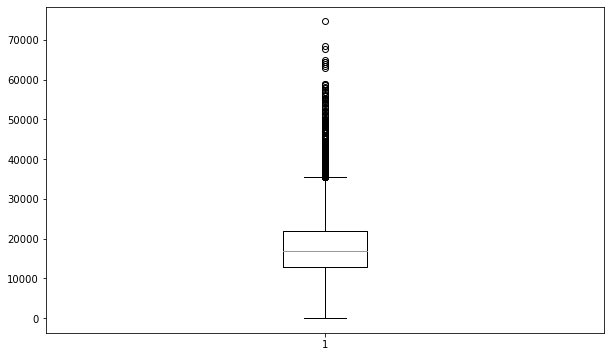

In [18]:
plt.figure(figsize=(10,6))
plt.boxplot(df.Price)

plt.show()

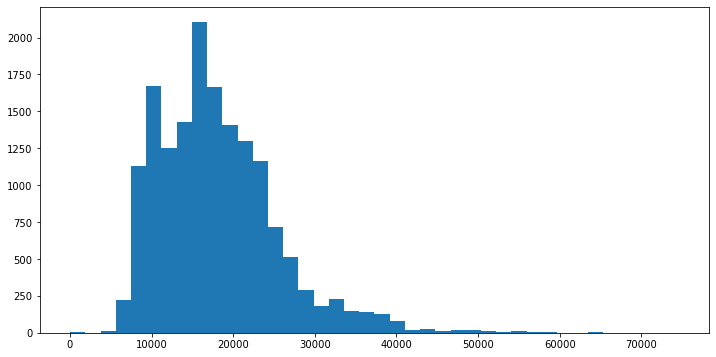

In [19]:
plt.figure(figsize=(12,6))
plt.hist(df.Price, bins=40)

plt.show()

In [20]:
price_outliers=list(df[(df.Price < 3000) | (df.Price > 35475)].index)

In [21]:
df.loc[price_outliers,'Price']= np.nan

In [22]:
df.loc[price_outliers,'Price']

713     NaN
732     NaN
3587    NaN
3589    NaN
3590    NaN
         ..
15914   NaN
15915   NaN
15916   NaN
15917   NaN
15918   NaN
Name: Price, Length: 483, dtype: float64

In [23]:
fill(df,'Model','Age','Price','ffill')

Number of NaN :  0
------------------
14990.0    154
15990.0    151
10990.0    139
33975.0    125
15900.0    106
          ... 
8440.0       1
13895.0      1
9965.0       1
13660.0      1
13860.0      1
Name: Price, Length: 2665, dtype: int64


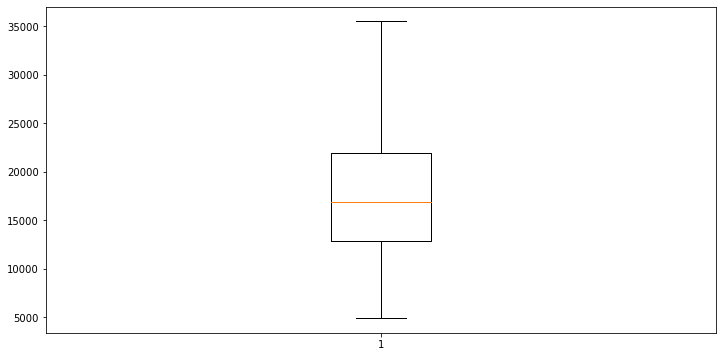

In [24]:
plt.figure(figsize=(12,6))
plt.boxplot(df.Price)

plt.show()

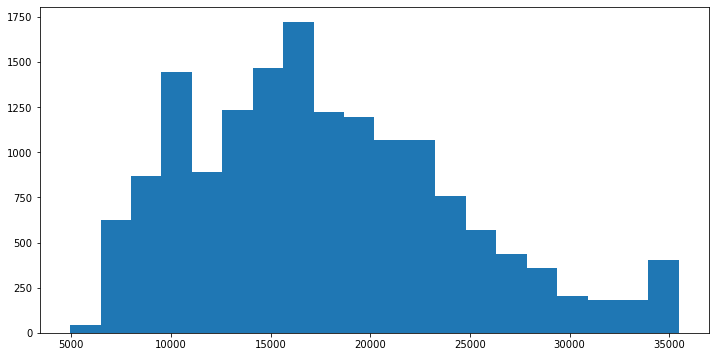

In [25]:
plt.figure(figsize=(12,6))
plt.hist(df.Price, bins=20)

plt.show()

## 📌HP

In [26]:
check_col(df,'hp')

hp , Sumation of isnull : 0
-----------------
Samples for hp 
 7911      77
5230      85
2054      85
8197      81
11816    121
9806      55
12710    100
290       85
6177      81
5091      85
Name: hp, dtype: int64
-----------------
hp Value_counts is 
 85     2544
66     2130
81     1402
100    1309
110    1114
       ... 
4         1
44        1
84        1
132       1
239       1
Name: hp, Length: 80, dtype: int64


In [27]:
df.hp.describe()

count    15919.000000
mean        88.416107
std         26.877475
min          1.000000
25%         66.000000
50%         85.000000
75%        101.000000
max        294.000000
Name: hp, dtype: float64

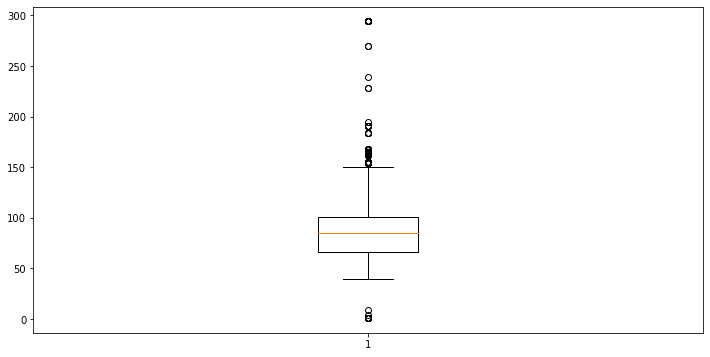

In [28]:
plt.figure(figsize=(12,6))
plt.boxplot(df.hp)

plt.show()

📍IQR = 2,5 olarak aldik.

In [29]:
hp_anomali=list(df[df.hp < 44].index)

In [30]:
df.loc[hp_anomali,'hp']= np.nan

In [31]:
df.loc[hp_anomali,'hp']

3913    NaN
6005    NaN
6034    NaN
6946    NaN
7014    NaN
7016    NaN
7018    NaN
7019    NaN
8857    NaN
9285    NaN
9287    NaN
9288    NaN
9289    NaN
9290    NaN
9292    NaN
9299    NaN
10468   NaN
10579   NaN
10580   NaN
10610   NaN
13759   NaN
13885   NaN
15155   NaN
15156   NaN
Name: hp, dtype: float64

In [32]:
fill(df,'Model','Body_Type','hp','mode')

Number of NaN :  0
------------------
85.0     2545
66.0     2131
81.0     1402
100.0    1312
110.0    1118
         ... 
163.0       1
84.0        1
137.0       1
123.0       1
75.0        1
Name: hp, Length: 76, dtype: int64


In [33]:
df.hp.isnull().sum()

0

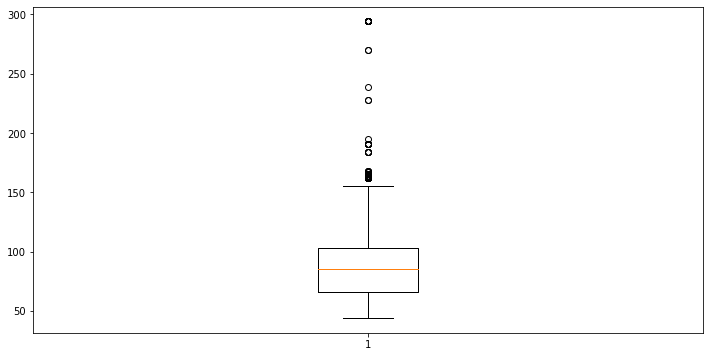

In [34]:
plt.figure(figsize=(12,6))
plt.boxplot(df.hp)

plt.show()

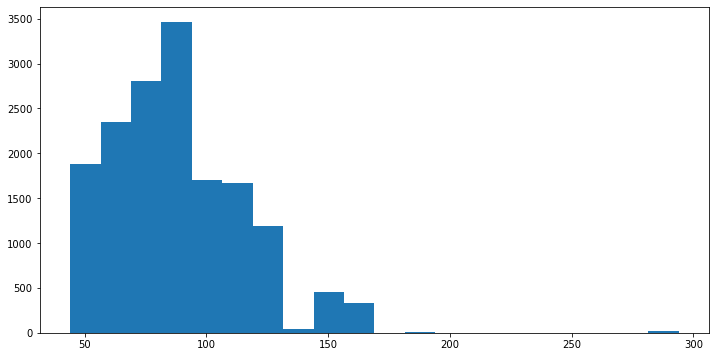

In [35]:
plt.figure(figsize=(12,6))
plt.hist(df.hp, bins=20)

plt.show()

## 📌Type

In [36]:
check_col(df,'Type')

Type , Sumation of isnull : 0
-----------------
Samples for Type 
 14393              Used
7238     Pre-registered
3529               Used
11386              Used
11071              Used
3503               Used
831                Used
9734     Employee's car
14910              Used
4818               Used
Name: Type, dtype: object
-----------------
Type Value_counts is 
 Used              11098
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: Type, dtype: int64


## 📌 Warranty

In [37]:
check_col(df,'Warranty')

Warranty , Sumation of isnull : 0
-----------------
Samples for Warranty 
 14334    12.0
15117    12.0
13974    12.0
3725     12.0
12236    12.0
3927     12.0
7128     12.0
6083      6.0
1334     12.0
4367     12.0
Name: Warranty, dtype: float64
-----------------
Warranty Value_counts is 
 12.0    13636
24.0     1124
60.0      402
36.0      289
48.0      149
6.0       125
72.0       59
3.0        33
23.0       11
16.0       11
18.0       10
20.0        7
25.0        6
2.0         5
50.0        4
26.0        4
34.0        3
1.0         3
13.0        3
4.0         3
19.0        3
9.0         2
17.0        2
14.0        2
28.0        2
11.0        2
21.0        2
45.0        2
46.0        2
22.0        2
15.0        1
33.0        1
30.0        1
56.0        1
7.0         1
8.0         1
10.0        1
49.0        1
47.0        1
40.0        1
65.0        1
Name: Warranty, dtype: int64


In [38]:
df.drop('Warranty', axis=1, inplace=True)

## 📌Brand

In [39]:
check_col(df,'Brand')

Brand , Sumation of isnull : 0
-----------------
Samples for Brand 
 4014        Audi
15335    Renault
8136        Opel
8870        Opel
6118        Opel
4515        Audi
13657    Renault
3418        Audi
1571        Audi
14555    Renault
Name: Brand, dtype: object
-----------------
Brand Value_counts is 
 Opel       7343
Audi       5712
Renault    2864
Name: Brand, dtype: int64


## 📌 Model

In [40]:
check_col(df,'Model')

Model , Sumation of isnull : 0
-----------------
Samples for Model 
 10411     Corsa
2638         A3
14674      Clio
6910      Astra
15693    Espace
8966      Corsa
4942         A3
6122      Astra
598          A1
4205         A3
Name: Model, dtype: object
-----------------
Model Value_counts is 
 A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: Model, dtype: int64


## 📌Age

In [41]:
check_col(df,'Age')

Age , Sumation of isnull : 0
-----------------
Samples for Age 
 8457     1.0
8205     0.0
12164    1.0
1475     1.0
4005     2.0
1279     1.0
6527     1.0
12571    0.0
8680     3.0
10146    0.0
Name: Age, dtype: float64
-----------------
Age Value_counts is 
 1.0    4813
0.0    4077
3.0    3696
2.0    3333
Name: Age, dtype: int64


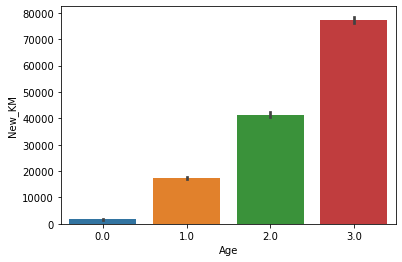

In [42]:
sns.barplot(x=df.Age,y=df.New_KM);

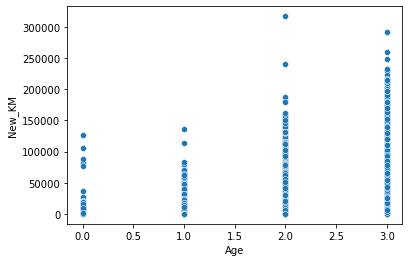

In [43]:
sns.scatterplot(x=df.Age,y=df.New_KM);

## 📌Nr_of_Doors

In [44]:
check_col(df,'Nr_of_Doors')

Nr_of_Doors , Sumation of isnull : 0
-----------------
Samples for Nr_of_Doors 
 3577     5.0
15466    4.0
584      3.0
7808     5.0
12891    5.0
13483    5.0
7177     5.0
1558     5.0
9425     4.0
5359     5.0
Name: Nr_of_Doors, dtype: float64
-----------------
Nr_of_Doors Value_counts is 
 5.0    11789
4.0     3079
3.0      832
2.0      219
Name: Nr_of_Doors, dtype: int64


In [45]:
df.drop('Nr_of_Doors', axis=1, inplace=True)

## 📌 Number_of_Seats

In [46]:
check_col(df,'Number_of_Seats')

Number_of_Seats , Sumation of isnull : 0
-----------------
Samples for Number_of_Seats 
 8578     5.0
2739     5.0
1628     4.0
8483     5.0
9668     5.0
3032     5.0
6217     5.0
860      4.0
5931     5.0
15485    7.0
Name: Number_of_Seats, dtype: float64
-----------------
Number_of_Seats Value_counts is 
 5.0    14179
4.0     1196
7.0      409
2.0      132
6.0        2
3.0        1
Name: Number_of_Seats, dtype: int64


In [47]:
df.drop('Number_of_Seats', axis=1, inplace=True)

## 📌Gearing_Type

In [48]:
check_col(df,'Gearing_Type')

Gearing_Type , Sumation of isnull : 0
-----------------
Samples for Gearing_Type 
 10857    Automatic
7370        Manual
13545       Manual
7427        Manual
2513        Manual
1183        Manual
14931    Automatic
403      Automatic
7486        Manual
7008        Manual
Name: Gearing_Type, dtype: object
-----------------
Gearing_Type Value_counts is 
 Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing_Type, dtype: int64


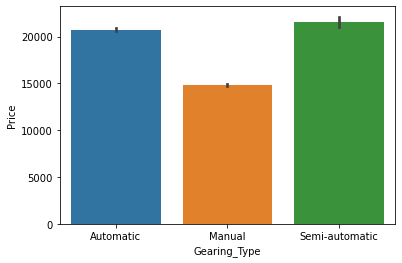

In [49]:
sns.barplot(x=df.Gearing_Type, y=df.Price);

## 📌Engine_Disp_cc

In [50]:
check_col(df,'Engine_Disp_cc')

Engine_Disp_cc , Sumation of isnull : 0
-----------------
Samples for Engine_Disp_cc 
 14675     898.0
14231    1461.0
12533    1598.0
13116    1197.0
3085     1598.0
11586    1956.0
3890     1598.0
13223    1197.0
13788    1618.0
3782     1598.0
Name: Engine_Disp_cc, dtype: float64
-----------------
Engine_Disp_cc Value_counts is 
 1598.0    5063
999.0     2467
1398.0    1388
1399.0     749
1461.0     686
          ... 
122.0        1
140.0        1
1390.0       1
54.0         1
1533.0       1
Name: Engine_Disp_cc, Length: 77, dtype: int64


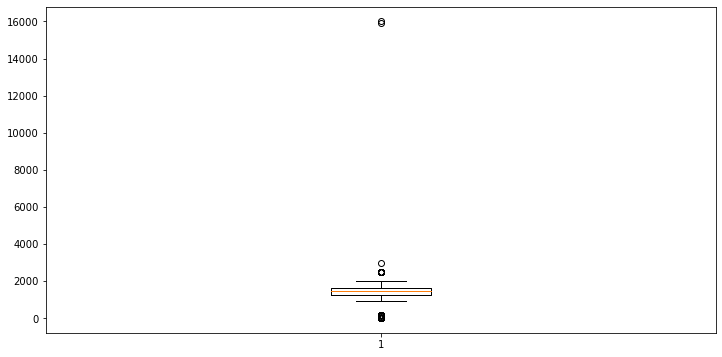

In [51]:
plt.figure(figsize=(12,6))
plt.boxplot(df.Engine_Disp_cc)

plt.show()

In [52]:
df.Engine_Disp_cc.describe()

count    15919.000000
mean      1426.172561
std        329.676109
min          1.000000
25%       1229.000000
50%       1461.000000
75%       1598.000000
max      16000.000000
Name: Engine_Disp_cc, dtype: float64

In [53]:
df.sort_values(by=['Engine_Disp_cc'], ascending=True)[['Engine_Disp_cc','Model']].head(55)

,Engine_Disp_cc,Model
14315,1.0,Clio
12800,1.0,Insignia
12798,1.0,Insignia
12796,1.0,Insignia
12484,1.0,Insignia
12790,1.0,Insignia
12786,1.0,Insignia
12783,1.0,Insignia
14327,1.0,Clio
12781,1.0,Insignia


In [54]:
df.sort_values(by=['Engine_Disp_cc'], ascending=False)[['Engine_Disp_cc','Model']].head(55)

,Engine_Disp_cc,Model
10932,16000.0,Insignia
7169,15898.0,Astra
10771,2967.0,Insignia
3592,2480.0,A3
3609,2480.0,A3
3608,2480.0,A3
3606,2480.0,A3
3605,2480.0,A3
3603,2480.0,A3
3648,2480.0,A3


In [55]:
Engine_Disp_cc_anomalies=list(df[(df.Engine_Disp_cc < 898)|(df.Engine_Disp_cc > 2480)].index)

In [56]:
df.loc[Engine_Disp_cc_anomalies,'Engine_Disp_cc']= np.nan

In [57]:
df.loc[Engine_Disp_cc_anomalies,'Engine_Disp_cc']

7169    NaN
7809    NaN
7810    NaN
7811    NaN
7812    NaN
8128    NaN
10194   NaN
10559   NaN
10771   NaN
10932   NaN
12467   NaN
12473   NaN
12484   NaN
12499   NaN
12501   NaN
12554   NaN
12604   NaN
12670   NaN
12750   NaN
12768   NaN
12769   NaN
12781   NaN
12783   NaN
12786   NaN
12790   NaN
12796   NaN
12798   NaN
12800   NaN
12815   NaN
12823   NaN
12835   NaN
12848   NaN
12849   NaN
13653   NaN
13904   NaN
13912   NaN
14198   NaN
14284   NaN
14314   NaN
14315   NaN
14319   NaN
14320   NaN
14321   NaN
14322   NaN
14324   NaN
14325   NaN
14326   NaN
14327   NaN
14328   NaN
15574   NaN
15575   NaN
15576   NaN
15577   NaN
15578   NaN
15579   NaN
Name: Engine_Disp_cc, dtype: float64

In [58]:
fill(df, 'Model', 'Body_Type','Engine_Disp_cc','median')

Number of NaN :  0
------------------
1598.0    5097
999.0     2467
1398.0    1389
1399.0     753
1461.0     702
          ... 
1195.0       1
1696.0       1
1350.0       1
1390.0       1
1533.0       1
Name: Engine_Disp_cc, Length: 66, dtype: int64


## 📌Cylinders

In [59]:
check_col(df,'Cylinders')

Cylinders , Sumation of isnull : 0
-----------------
Samples for Cylinders 
 8056     3.0
3039     4.0
13312    4.0
8611     4.0
12790    4.0
6925     4.0
14907    4.0
5646     4.0
6727     4.0
886      3.0
Name: Cylinders, dtype: float64
-----------------
Cylinders Value_counts is 
 4.0    12544
3.0     3340
5.0       23
8.0        5
6.0        3
2.0        3
1.0        1
Name: Cylinders, dtype: int64


In [60]:
Cylinders_anomalies=list(df[(df.Cylinders < 3.0)|(df.Cylinders > 5.0)].index) #1,2,6 ve 8 i anomali olarak aldik.

In [61]:
df.loc[Cylinders_anomalies,'Cylinders']= np.nan

In [62]:
df.loc[Cylinders_anomalies,'Cylinders']

535     NaN
536     NaN
537     NaN
9956    NaN
10771   NaN
10826   NaN
11342   NaN
12897   NaN
15055   NaN
15056   NaN
15835   NaN
15836   NaN
Name: Cylinders, dtype: float64

In [63]:
fill(df,'Model','Body_Type','Cylinders','mode')

Number of NaN :  0
------------------
4.0    12553
3.0     3343
5.0       23
Name: Cylinders, dtype: int64


## Drive_chain

In [64]:
check_col(df,'Drive_chain')

Drive_chain , Sumation of isnull : 0
-----------------
Samples for Drive_chain 
 11578    front
9029     front
6472     front
5167     front
4445     front
10667    front
11540    front
14116    front
11800    front
15732    front
Name: Drive_chain, dtype: object
-----------------
Drive_chain Value_counts is 
 front    15711
4WD        204
rear         4
Name: Drive_chain, dtype: int64


In [65]:
df.drop('Drive_chain',axis = 1,inplace = True)

## Fuel

In [66]:
check_col(df,'Fuel')

Fuel , Sumation of isnull : 0
-----------------
Samples for Fuel 
 6889      Diesel
7703      Others
12258    Benzine
15183     Diesel
15205     Diesel
1935     Benzine
6488      Diesel
8806     Benzine
176       Diesel
10848     Diesel
Name: Fuel, dtype: object
-----------------
Fuel Value_counts is 
 Benzine     7707
Diesel      7299
Others       844
CNG/LPG       64
Electric       5
Name: Fuel, dtype: int64


In [67]:
Fuel_missing=list(df[df.Fuel == 'Others'].index)

In [68]:
df.loc[Fuel_missing,'Fuel']= np.nan

In [69]:
fill(df,'Model','Body_Type','Fuel','mode')

Number of NaN :  0
------------------
Benzine     8273
Diesel      7577
CNG/LPG       64
Electric       5
Name: Fuel, dtype: int64


In [70]:
df.columns

Index(['Price', 'hp', 'Type', 'Brand', 'Model', 'Age', 'Gearing_Type',
       'Engine_Disp_cc', 'Cylinders', 'Fuel', 'CO2_Emission', 'Emission_Class',
       'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'Gears', 'Body_Type', 'VAT_Deductable',
       'Price_Negotiable', 'Prev_Owner', 'Inspection_New', 'Body_Color',
       'Paint_Type', 'Uphol_Material', 'Uphol_Colors', 'Country_Cons',
       'City_Cons', 'Comb_Cons', 'New_KM'],
      dtype='object')

## CO2_Emission

In [71]:
check_col(df,'CO2_Emission')

CO2_Emission , Sumation of isnull : 0
-----------------
Samples for CO2_Emission 
 2555     106.0
13348      9.0
10915    119.0
2100     108.0
5284     103.0
15092    125.0
10222    129.0
6282     127.0
2525     104.0
7934     107.0
Name: CO2_Emission, dtype: float64
-----------------
CO2_Emission Value_counts is 
 120.000    920
97.000     620
99.000     619
104.000    599
10.000     541
          ... 
12.324       1
45.000       1
51.000       1
13.983       1
177.000      1
Name: CO2_Emission, Length: 120, dtype: int64


In [72]:
df.drop('CO2_Emission',axis = 1,inplace = True)

## Emission_Class

In [73]:
check_col(df,'Emission_Class')

Emission_Class , Sumation of isnull : 0
-----------------
Samples for Emission_Class 
 2055           Euro 6
2324     Euro 6d-TEMP
9224           Euro 6
14223          Euro 6
12997    Euro 6d-TEMP
15375          Euro 6
902            Euro 6
367            Euro 6
4871           Euro 6
3424           Euro 6
Name: Emission_Class, dtype: object
-----------------
Emission_Class Value_counts is 
 Euro 6          13143
Euro 6d-TEMP     2467
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             42
Name: Emission_Class, dtype: int64


In [74]:
df.drop('Emission_Class',axis = 1,inplace=True)

## Comfort_Convenience

In [75]:
check_col(df,'Comfort_Convenience') #getdummy() uygulanacak.

Comfort_Convenience , Sumation of isnull : 0
-----------------
Samples for Comfort_Convenience 
 14056    Air conditioning,Automatic climate control,Cru...
3457     Air conditioning,Armrest,Automatic climate con...
12498    Air conditioning,Armrest,Automatic climate con...
7838     Air conditioning,Armrest,Automatic climate con...
5160     Air conditioning,Armrest,Automatic climate con...
5419     Armrest,Cruise control,Electrical side mirrors...
2991                         Multi-function steering wheel
3047     Air conditioning,Cruise control,Electrically a...
11167    Air conditioning,Armrest,Cruise control,Electr...
10818    Air conditioning,Air suspension,Armrest,Automa...
Name: Comfort_Convenience, dtype: object
-----------------
Comfort_Convenience Value_counts is 
 Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                      

## Entertainment_Media

In [76]:
check_col(df,'Entertainment_Media')#getdummy() uygulanacak.

Entertainment_Media , Sumation of isnull : 0
-----------------
Samples for Entertainment_Media 
 10820    ['Hands-free equipment', 'MP3', 'On-board comp...
9304     ['Bluetooth', 'Hands-free equipment', 'On-boar...
658      ['Bluetooth', 'Hands-free equipment', 'MP3', '...
3379     ['Bluetooth', 'CD player', 'Digital radio', 'H...
995      ['Bluetooth', 'CD player', 'Hands-free equipme...
13383          ['Bluetooth', 'On-board computer', 'Radio']
5204                                ['Bluetooth', 'Radio']
5116                 ['Bluetooth', 'Hands-free equipment']
14796    ['Bluetooth', 'CD player', 'On-board computer'...
11159    ['Bluetooth', 'On-board computer', 'Radio', 'U...
Name: Entertainment_Media, dtype: object
-----------------
Entertainment_Media Value_counts is 
 ['Bluetooth', 'Hands-free equipment', 'On-board computer', 'Radio', 'USB']                                                              1381
['Bluetooth', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 

##  Extras

In [77]:
check_col(df,'Extras') #getdummy() uygulanacak

Extras , Sumation of isnull : 0
-----------------
Samples for Extras 
 6890                            Touch screen,Voice Control
11386                            Alloy wheels,Touch screen
9622     Alloy wheels,Catalytic Converter,Handicapped e...
15846              Alloy wheels,Touch screen,Voice Control
9626                                          Alloy wheels
8720                                          Alloy wheels
8046                                   Catalytic Converter
7576                 Alloy wheels,Sport seats,Touch screen
14883                     Catalytic Converter,Touch screen
7666     Alloy wheels,Catalytic Converter,Sport seats,T...
Name: Extras, dtype: object
-----------------
Extras Value_counts is 
 Alloy wheels                                                                                                            3900
Alloy wheels,Touch screen                                                                                                833
Alloy wheels,Voice

## Safety_Security

In [78]:
check_col(df,'Safety_Security') #getdummy() uygulanacak.

Safety_Security , Sumation of isnull : 0
-----------------
Samples for Safety_Security 
 6108     ABS,Central door lock with remote control,Dayt...
7083     ABS,Central door lock with remote control,Driv...
9561     ABS,Central door lock,Daytime running lights,D...
13309    ABS,Central door lock,Fog lights,Isofix,Power ...
8276     ABS,Central door lock,Daytime running lights,D...
11114    ABS,Adaptive headlights,Central door lock,Dayt...
12647    ABS,Adaptive Cruise Control,Adaptive headlight...
1300     ABS,Central door lock,Daytime running lights,D...
13803    ABS,Alarm system,Central door lock,Central doo...
14564             ABS,Central door lock,Driver-side airbag
Name: Safety_Security, dtype: object
-----------------
Safety_Security Value_counts is 
 ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control            

##  Gears

In [79]:
check_col(df,'Gears') 

Gears , Sumation of isnull : 0
-----------------
Samples for Gears 
 11355    6.0
15382    6.0
10100    5.0
7998     5.0
13139    5.0
7180     6.0
13743    5.0
2781     7.0
4659     7.0
4339     6.0
Name: Gears, dtype: float64
-----------------
Gears Value_counts is 
 6.0     8410
5.0     5363
7.0     1908
8.0      224
9.0        6
4.0        2
1.0        2
3.0        2
50.0       1
2.0        1
Name: Gears, dtype: int64


In [80]:
Gears_anomalies=list(df[(df.Gears == 50) | (df.Gears <5)].index)

In [81]:
df.loc[Gears_anomalies,'Gears']= np.nan

In [82]:
fill(df,'Model','Body_Type','Gears','mode')

Number of NaN :  0
------------------
6.0    8414
5.0    5367
7.0    1908
8.0     224
9.0       6
Name: Gears, dtype: int64


In [83]:
df.drop('Gears',axis = 1,inplace = True)

## Body_Type

In [84]:
check_col(df,'Body_Type') 

Body_Type , Sumation of isnull : 0
-----------------
Samples for Body_Type 
 12022    Station wagon
2016             Sedan
6032     Station wagon
1838             Sedan
5018             Sedan
15871              Van
10592    Station wagon
12527            Sedan
276            Compact
4291             Sedan
Name: Body_Type, dtype: object
-----------------
Body_Type Value_counts is 
 Sedan            8005
Station wagon    3678
Compact          3242
Van               817
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: Body_Type, dtype: int64


## VAT_Deductable

In [85]:
check_col(df,'VAT_Deductable') 

VAT_Deductable , Sumation of isnull : 0
-----------------
Samples for VAT_Deductable 
 14003    False
9326      True
3413     False
5614      True
6455      True
15424     True
5079      True
6845     False
3934     False
760      False
Name: VAT_Deductable, dtype: bool
-----------------
VAT_Deductable Value_counts is 
 True     10980
False     4939
Name: VAT_Deductable, dtype: int64


## Price_Negotiable

In [86]:
check_col(df,'Price_Negotiable') 

Price_Negotiable , Sumation of isnull : 0
-----------------
Samples for Price_Negotiable 
 11639    False
10947    False
10714    False
2290     False
14769    False
3223     False
5243     False
8703     False
3707     False
2669     False
Name: Price_Negotiable, dtype: bool
-----------------
Price_Negotiable Value_counts is 
 False    15493
True       426
Name: Price_Negotiable, dtype: int64


In [87]:
df.drop('Price_Negotiable',axis = 1, inplace = True)

## Prev_Owner

In [88]:
check_col(df,'Prev_Owner') 

Prev_Owner , Sumation of isnull : 0
-----------------
Samples for Prev_Owner 
 14739    1.0
2675     1.0
14821    1.0
12805    1.0
5173     1.0
10093    1.0
9461     1.0
7956     1.0
1887     1.0
9366     1.0
Name: Prev_Owner, dtype: float64
-----------------
Prev_Owner Value_counts is 
 1.0    15055
2.0      845
3.0       17
4.0        2
Name: Prev_Owner, dtype: int64


In [89]:
df.drop('Prev_Owner',axis = 1,inplace = True)

## Inspection_New

In [90]:
check_col(df,'Inspection_New') 

Inspection_New , Sumation of isnull : 0
-----------------
Samples for Inspection_New 
 1678     Yes
6369      No
15913     No
7307      No
11336     No
11468    Yes
14077     No
5512      No
4685      No
7162     Yes
Name: Inspection_New, dtype: object
-----------------
Inspection_New Value_counts is 
 No     11987
Yes     3932
Name: Inspection_New, dtype: int64


## Body_Color

In [91]:
check_col(df,'Body_Color') 

Body_Color , Sumation of isnull : 0
-----------------
Samples for Body_Color 
 21       Black
11351     Grey
10531    Black
14217    White
2777     White
15257    Brown
13176      Red
13599    White
3490     Black
5783     Brown
Name: Body_Color, dtype: object
-----------------
Body_Color Value_counts is 
 Black     3900
Grey      3615
White     3520
Silver    1707
Blue      1522
Red        995
Brown      298
Green      166
Beige      116
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body_Color, dtype: int64


In [92]:
df.drop('Body_Color',axis = 1, inplace = True)

## Paint_Type

In [93]:
check_col(df,'Paint_Type') 

Paint_Type , Sumation of isnull : 0
-----------------
Samples for Paint_Type 
 11550     Metallic
14609     Metallic
14359     Metallic
6527      Metallic
11482     Metallic
14939     Metallic
12994    Uni/basic
4976      Metallic
10938     Metallic
2030      Metallic
Name: Paint_Type, dtype: object
-----------------
Paint_Type Value_counts is 
 Metallic       15549
Uni/basic        364
Perl effect        6
Name: Paint_Type, dtype: int64


## Uphol_Material

In [94]:
check_col(df,'Uphol_Material') 

Uphol_Material , Sumation of isnull : 0
-----------------
Samples for Uphol_Material 
 10411           Cloth
2138            Cloth
7642     Full leather
9771            Cloth
116             Cloth
1809            Cloth
4189            Cloth
5515     Part leather
2314            Cloth
3137            Cloth
Name: Uphol_Material, dtype: object
-----------------
Uphol_Material Value_counts is 
 Cloth           11693
Part leather     2135
Full leather     1402
Other             518
alcantara          92
Velour             79
Name: Uphol_Material, dtype: int64


##  Uphol_Colors

In [95]:
check_col(df,'Uphol_Colors') 

Uphol_Colors , Sumation of isnull : 0
-----------------
Samples for Uphol_Colors 
 4346     Black
4734     Black
14421    Black
15755    Other
4377     Black
12893    Other
12019    Black
2393     Black
13300    Other
5853      Grey
Name: Uphol_Colors, dtype: object
-----------------
Uphol_Colors Value_counts is 
 Black           10481
Grey             1975
Other            1416
Cloth            1215
Brown             318
Full leather      182
Part leather      180
Beige              70
White              27
Blue               22
Velour             16
Red                10
Yellow              4
alcantara           2
Orange              1
Name: Uphol_Colors, dtype: int64


In [96]:
#df.drop('Uphol_Colors',axis =1,inplace = True)

## Upholstery

In [97]:
df["Upholstery"]=df["Uphol_Colors"] +","+ df["Uphol_Material"]

In [98]:
df.Upholstery

0                      Black,Cloth
1                       Grey,Cloth
2                      Black,Cloth
3                       Grey,Cloth
4                      Black,Cloth
                   ...            
15914           Brown,Full leather
15915           Cloth,Full leather
15916           Black,Full leather
15917    Part leather,Full leather
15918           Brown,Full leather
Name: Upholstery, Length: 15919, dtype: object

## Country_Cons

In [99]:
check_col(df,'Country_Cons') 

Country_Cons , Sumation of isnull : 0
-----------------
Samples for Country_Cons 
 5905     5.8
12578    9.4
9202     6.0
13396    3.5
12987    5.4
6172     6.3
14731    4.0
3518     4.5
7231     5.7
13383    3.5
Name: Country_Cons, dtype: float64
-----------------
Country_Cons Value_counts is 
 5.0    1024
4.0     957
5.8     678
4.5     677
5.1     636
       ... 
3.6       2
9.0       2
8.8       2
9.5       2
9.7       1
Name: Country_Cons, Length: 69, dtype: int64


In [100]:
df.drop('Country_Cons',axis =1,inplace = True)

## City_Cons

In [101]:
check_col(df,'City_Cons') 

City_Cons , Sumation of isnull : 0
-----------------
Samples for City_Cons 
 10814    5.0
12790    4.1
5038     4.4
14088    3.3
1467     4.2
5480     4.1
11940    4.6
14629    3.1
11557    4.9
2179     4.2
Name: City_Cons, dtype: float64
-----------------
City_Cons Value_counts is 
 4.2    1410
3.7    1230
4.4    1144
4.5    1049
3.8     941
3.9     937
4.1     718
4.0     712
4.7     705
4.3     627
3.5     610
4.6     590
3.1     574
3.6     562
3.3     559
4.9     547
3.4     419
4.8     372
5.3     319
5.1     255
5.7     244
5.4     243
3.2     211
5.6     181
3.0     177
5.0     143
5.2     100
6.3      55
5.5      44
6.0      43
5.8      35
1.0      35
7.7      20
6.6      19
6.4      16
2.9      16
0.0      12
2.8      10
7.1       7
6.5       4
7.3       4
5.9       3
6.7       3
2.0       3
6.9       3
7.8       2
7.0       2
7.6       1
6.1       1
8.0       1
8.6       1
Name: City_Cons, dtype: int64


In [102]:
df.drop('City_Cons',axis =1,inplace = True)

## Comb_Cons

In [103]:
check_col(df,'Comb_Cons') 

Comb_Cons , Sumation of isnull : 0
-----------------
Samples for Comb_Cons 
 15619    5.1
2900     3.8
11262    4.1
7811     6.1
3716     3.9
1294     5.1
7959     4.7
7859     4.8
15239    4.6
12815    4.9
Name: Comb_Cons, dtype: float64
-----------------
Comb_Cons Value_counts is 
 5.4    834
3.9    814
4.0    799
5.6    774
5.1    739
3.8    726
4.7    725
4.4    711
5.0    616
4.5    606
4.8    596
4.6    552
5.2    524
4.2    485
5.3    479
5.5    437
4.9    428
3.7    414
3.3    396
5.9    393
4.3    391
4.1    389
5.7    386
3.5    344
6.0    341
6.2    233
3.6    218
5.8    199
6.3    189
6.1    176
6.6    171
6.8    149
3.4    126
3.0     82
6.4     77
7.4     70
6.7     52
6.5     39
1.0     38
7.1     38
3.2     33
6.9     28
8.3     21
7.6     14
7.0     12
3.1     11
7.8     10
7.2      8
8.0      6
8.6      5
8.7      3
7.9      2
7.5      2
7.3      2
8.1      2
0.0      2
1.2      1
9.1      1
Name: Comb_Cons, dtype: int64


## New_KM

In [104]:
check_col(df,'New_KM') 

New_KM , Sumation of isnull : 0
-----------------
Samples for New_KM 
 10756    97000.000000
15025    20329.000000
11336    25272.000000
14484    32000.000000
11069    40000.000000
3062     77536.000000
5464        10.000000
15755     5550.000000
13009     1748.271975
10230       15.000000
Name: New_KM, dtype: float64
-----------------
New_KM Value_counts is 
 10.000000       1045
1748.271975      812
1.000000         367
17479.470969     180
5.000000         170
                ... 
20719.000000       1
91910.000000       1
39860.000000       1
28084.000000       1
57889.000000       1
Name: New_KM, Length: 6693, dtype: int64


In [105]:
df.rename(columns = {'New_KM':'KM'}, inplace = True)

In [106]:
df.columns

Index(['Price', 'hp', 'Type', 'Brand', 'Model', 'Age', 'Gearing_Type',
       'Engine_Disp_cc', 'Cylinders', 'Fuel', 'Comfort_Convenience',
       'Entertainment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'VAT_Deductable', 'Inspection_New', 'Paint_Type', 'Uphol_Material',
       'Uphol_Colors', 'Comb_Cons', 'KM', 'Upholstery'],
      dtype='object')

In [107]:
df.shape

(15919, 23)

In [108]:
hp_anomali=list(df[df.hp < 44].index)

In [109]:
df.loc[hp_anomali,'hp']= np.nan

In [110]:
df.loc[hp_anomali,'hp']

Series([], Name: hp, dtype: float64)

In [111]:
list(df.columns)

['Price',
 'hp',
 'Type',
 'Brand',
 'Model',
 'Age',
 'Gearing_Type',
 'Engine_Disp_cc',
 'Cylinders',
 'Fuel',
 'Comfort_Convenience',
 'Entertainment_Media',
 'Extras',
 'Safety_Security',
 'Body_Type',
 'VAT_Deductable',
 'Inspection_New',
 'Paint_Type',
 'Uphol_Material',
 'Uphol_Colors',
 'Comb_Cons',
 'KM',
 'Upholstery']

In [112]:
df1=pd.read_csv("Upholstery.csv")

In [113]:
check_col(df1,"Upholstery")

Upholstery , Sumation of isnull : 3720
-----------------
Samples for Upholstery 
 4547            Cloth, Black
8276            Cloth, Black
10046           Cloth, Black
5392            Cloth, Other
7300     Part leather, Black
5958                     NaN
14504           Cloth, Black
10599    Full leather, Black
11360                    NaN
12840     Part leather, Grey
Name: Upholstery, dtype: object
-----------------
Upholstery Value_counts is 
 Cloth, Black           5821
NaN                    3720
Part leather, Black    1121
Cloth                  1005
Cloth, Grey             891
Cloth, Other            639
Full leather, Black     575
Black                   491
Grey                    273
Other, Other            182
Part leather            140
Full leather            139
Part leather, Grey      116
Full leather, Brown     116
Other, Black            110
Full leather, Other      72
Full leather, Grey       67
Part leather, Other      65
Other                    56
Part leather, Bro

In [114]:
df.Uphol_Material.value_counts()

Cloth           11693
Part leather     2135
Full leather     1402
Other             518
alcantara          92
Velour             79
Name: Uphol_Material, dtype: int64

In [115]:
Uphol_Material_anomali = list(df[(df.Uphol_Material == "Other")].index)

In [116]:
df.loc[Uphol_Material_anomali,"Uphol_Material"] = np.nan

In [117]:
fill(df,"Model","Body_Type","Uphol_Material","mode")

Number of NaN :  0
------------------
Cloth           12173
Part leather     2137
Full leather     1438
alcantara          92
Velour             79
Name: Uphol_Material, dtype: int64


In [118]:
check_col(df,"Uphol_Material")

Uphol_Material , Sumation of isnull : 0
-----------------
Samples for Uphol_Material 
 5665            Cloth
9082            Cloth
633      Part leather
5809     Part leather
15403    Full leather
8293            Cloth
10785    Full leather
2416            Cloth
3205            Cloth
1987            Cloth
Name: Uphol_Material, dtype: object
-----------------
Uphol_Material Value_counts is 
 Cloth           12173
Part leather     2137
Full leather     1438
alcantara          92
Velour             79
Name: Uphol_Material, dtype: int64


In [119]:
df.drop('Uphol_Colors', axis=1, inplace=True)

In [120]:
df.isnull().sum()

Price                  0
hp                     0
Type                   0
Brand                  0
Model                  0
Age                    0
Gearing_Type           0
Engine_Disp_cc         0
Cylinders              0
Fuel                   0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
Body_Type              0
VAT_Deductable         0
Inspection_New         0
Paint_Type             0
Uphol_Material         0
Comb_Cons              0
KM                     0
Upholstery             0
dtype: int64

In [150]:
numeric_column=['Price', 'KM', 'Age', 'hp', 'Engine_Disp_cc', 'Cylinders', 'Comb_Cons']

In [151]:
df_num_column=df[numeric_column]

In [152]:
df_num_column

,Price,KM,Age,hp,Engine_Disp_cc,Cylinders,Comb_Cons
0,15770.0,56013.000000,3.0,66.0,1422.0,3.0,3.8
1,14500.0,80000.000000,2.0,141.0,1798.0,4.0,5.6
2,14640.0,83450.000000,3.0,85.0,1598.0,3.0,3.8
3,14500.0,73000.000000,3.0,66.0,1422.0,3.0,3.8
4,16790.0,16200.000000,3.0,66.0,1422.0,3.0,4.1
...,...,...,...,...,...,...,...
15914,33975.0,1748.271975,0.0,147.0,1997.0,4.0,5.3
15915,33975.0,9900.000000,0.0,165.0,1798.0,4.0,6.8
15916,33975.0,15.000000,0.0,146.0,1997.0,4.0,5.3
15917,33975.0,10.000000,0.0,147.0,1997.0,4.0,5.3


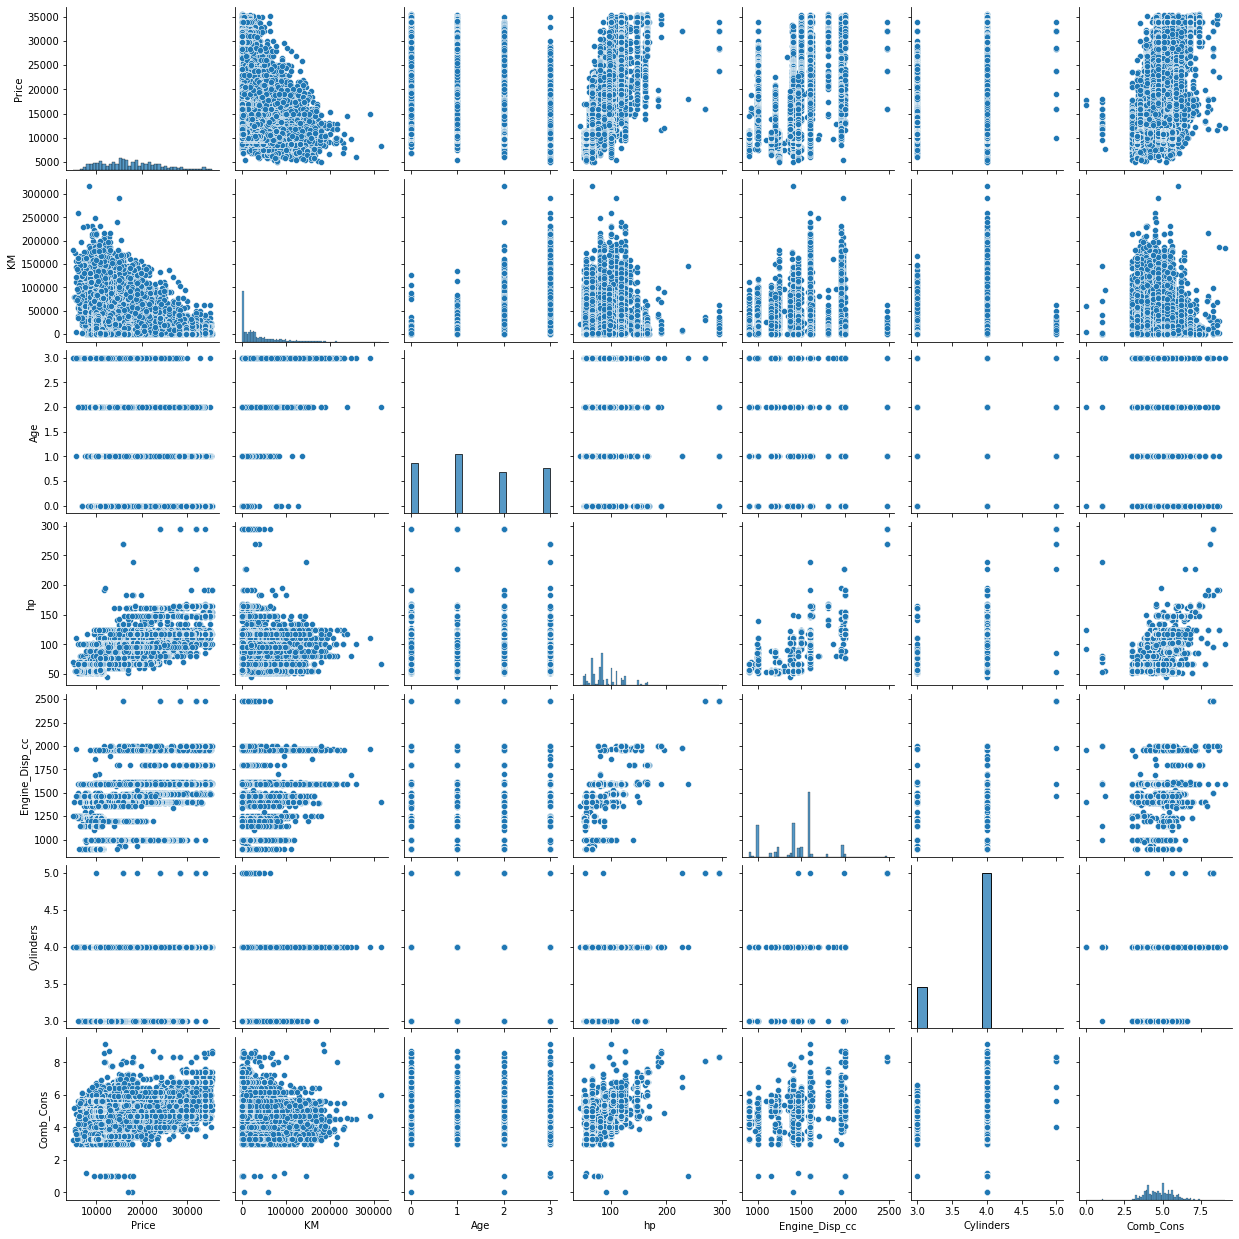

In [154]:
sns.pairplot(df_num_column, size=2.5)

plt.show()

In [162]:
df_num_column.corr()

,Price,KM,Age,hp,Engine_Disp_cc,Cylinders,Comb_Cons
Price,1.000000,-0.416244,-0.489023,0.667083,0.249837,-0.038820,0.269737
KM,-0.416244,1.000000,0.751166,0.001794,0.301592,0.212916,-0.326854
Age,-0.489023,0.751166,1.000000,-0.090888,0.200168,0.168556,-0.349193
hp,0.667083,0.001794,-0.090888,1.000000,0.596479,0.293484,0.402660
Engine_Disp_cc,0.249837,0.301592,0.200168,0.596479,1.000000,0.643609,0.021661
Cylinders,-0.038820,0.212916,0.168556,0.293484,0.643609,1.000000,0.154261
Comb_Cons,0.269737,-0.326854,-0.349193,0.402660,0.021661,0.154261,1.000000


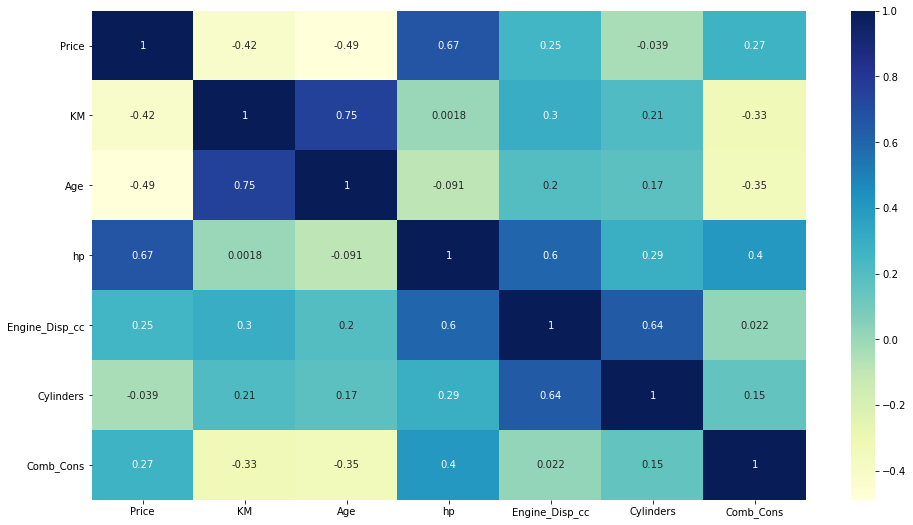

In [168]:
plt.figure(figsize = (16,9))
sns.heatmap(df_num_column.corr(),cmap="YlGnBu", annot=True)
plt.show();

In [132]:
df.to_csv('final_10_not_dummy.csv', index=False)

In [133]:
df = df.join(df['Comfort_Convenience'].str.get_dummies(",").add_prefix("Cc_"))

In [134]:
df.shape

(15919, 60)

In [135]:
df = df.join(df['Entertainment_Media'].str.get_dummies(", ").add_prefix("Ee_"))

In [136]:
df.shape

(15919, 94)

In [137]:
df = df.join(df['Extras'].str.get_dummies(",").add_prefix("Ex_"))

In [138]:
df.shape

(15919, 111)

In [139]:
df = df.join(df['Safety_Security'].str.get_dummies(",").add_prefix("Ss_"))

In [140]:
df.shape

(15919, 140)

In [141]:
df.drop(["Entertainment_Media","Comfort_Convenience","Extras","Safety_Security"],axis=1,inplace = True)

In [142]:
df.shape

(15919, 136)

In [143]:
df_final = pd.get_dummies(df)

In [144]:
df_final.shape

(15919, 221)

In [146]:
list(df_final.columns)

['Price',
 'hp',
 'Age',
 'Engine_Disp_cc',
 'Cylinders',
 'VAT_Deductable',
 'Comb_Cons',
 'KM',
 'Cc_Air conditioning',
 'Cc_Air suspension',
 'Cc_Armrest',
 'Cc_Automatic climate control',
 'Cc_Auxiliary heating',
 'Cc_Cruise control',
 'Cc_Electric Starter',
 'Cc_Electric tailgate',
 'Cc_Electrical side mirrors',
 'Cc_Electrically adjustable seats',
 'Cc_Electrically heated windshield',
 'Cc_Heads-up display',
 'Cc_Heated steering wheel',
 'Cc_Hill Holder',
 'Cc_Keyless central door lock',
 'Cc_Leather seats',
 'Cc_Leather steering wheel',
 'Cc_Light sensor',
 'Cc_Lumbar support',
 'Cc_Massage seats',
 'Cc_Multi-function steering wheel',
 'Cc_Navigation system',
 'Cc_Panorama roof',
 'Cc_Park Distance Control',
 'Cc_Parking assist system camera',
 'Cc_Parking assist system self-steering',
 'Cc_Parking assist system sensors front',
 'Cc_Parking assist system sensors rear',
 'Cc_Power windows',
 'Cc_Rain sensor',
 'Cc_Seat heating',
 'Cc_Seat ventilation',
 'Cc_Split rear seats',
 'C

In [147]:
df_final.to_csv('final_10_done_dummy.csv', index=False)